In [79]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [80]:
# Read the data

df = pd.read_csv('movies.csv')

In [81]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [82]:
df.shape

(7668, 15)

In [83]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [84]:
# See for any missing data

for col in df:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [85]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [86]:
# Split released column into release date and release country

df['release_date'] = df['released'].astype(str).str.split('(').str[0]
df['release_country'] = df['released'].astype(str).str.split('(').str[1].str[:-1]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


In [87]:
# Change data type of release_date column to datetime

df['release_date'] = pd.to_datetime(df['release_date'])

df.dtypes

name                       object
rating                     object
genre                      object
year                        int64
released                   object
score                     float64
votes                     float64
director                   object
writer                     object
star                       object
country                    object
budget                    float64
gross                     float64
company                    object
runtime                   float64
release_date       datetime64[ns]
release_country            object
dtype: object

In [88]:
# Drop released column

df.drop('released', axis=1, inplace=True)

df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25,United States


In [90]:
# Fill NaN for score and votes columns

df['score'] = df['score'].fillna(round(df['score'].mean(),1))
df['votes'] = df['votes'].fillna(df['votes'].mean())

df[['score','votes']].isnull().sum()

score    0
votes    0
dtype: int64

In [91]:
# Impute missing values and change data types

df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')

df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States


In [92]:
# Create a release year column

df['release_year'] = df['release_date'].astype(str).str[:4]

df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States,1980
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States,1980
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020-10-23,United States,2020
7664,Dream Round,NaN,Comedy,2020,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020-02-07,United States,2020
7665,Saving Mbango,NaN,Drama,2020,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020-04-27,Cameroon,2020
7666,It's Just Us,NaN,Drama,2020,6.4,88108,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020-10-01,United States,2020


In [93]:
# change data type of release_year to int

df = df.drop([5728,5730])
df[df.release_year=='NaT']

df['release_year'] = df['release_year'].astype('int64')

In [94]:
# See the df ordered by gross 

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States,2019
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,Boardinghouse,R,Comedy,1982,3.8,651,John Wintergate,John Wintergate,John Wintergate,United States,10000,0,Blustarr,98.0,1983-10-21,United States,1983
326,Love Child,R,Crime,1982,5.7,253,Larry Peerce,Anne Gerard,Amy Madigan,United States,0,0,The Ladd Company,96.0,1982-10-15,United States,1982
324,The Wizard of Oz,Not Rated,Animation,1982,6.8,352,Fumihiko Takayama,Yoshimitsu Banno,Aileen Quinn,United States,0,0,Alan Enterprises,78.0,1982-10-06,United States,1982
1199,Walk Like a Man,PG,Comedy,1987,4.8,1400,Melvin Frank,Robert Klane,Christopher Lloyd,United States,0,0,Metro-Goldwyn-Mayer (MGM),86.0,1987-04-17,United States,1987


In [95]:
# Drop old year column

df.drop('year', axis=1,inplace=True)
df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States,1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States,1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States,1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020-10-23,United States,2020
7664,Dream Round,NaN,Comedy,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020-02-07,United States,2020
7665,Saving Mbango,NaN,Drama,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020-04-27,Cameroon,2020
7666,It's Just Us,NaN,Drama,6.4,88108,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020-10-01,United States,2020


In [96]:
 # drop any duplicates
    
df.drop_duplicates()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States,1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States,1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States,1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020-10-23,United States,2020
7664,Dream Round,NaN,Comedy,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020-02-07,United States,2020
7665,Saving Mbango,NaN,Drama,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020-04-27,Cameroon,2020
7666,It's Just Us,NaN,Drama,6.4,88108,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020-10-01,United States,2020


## Start finding correlation with Gross

In [97]:
df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States,1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States,1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States,1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020-10-23,United States,2020
7664,Dream Round,NaN,Comedy,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020-02-07,United States,2020
7665,Saving Mbango,NaN,Drama,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020-04-27,Cameroon,2020
7666,It's Just Us,NaN,Drama,6.4,88108,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020-10-01,United States,2020


### My hypothesis:

#### 1. Budget has high correlation with Gross earnings
#### 2. Company has high correlation with Gross earnings

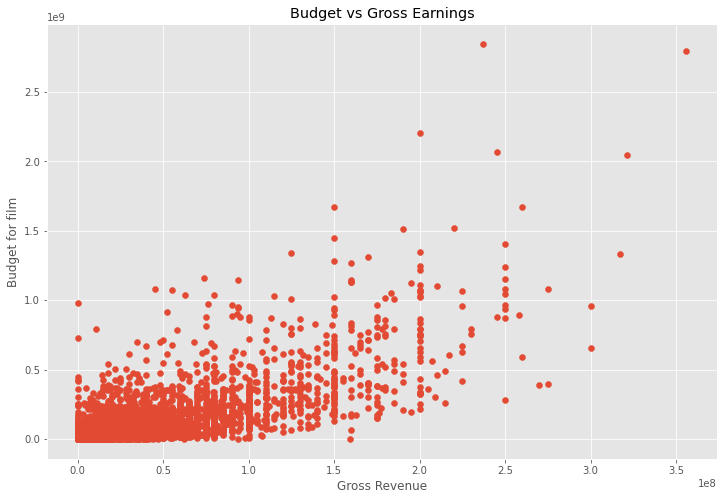

In [98]:
# Scatter plot of budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel('Gross Revenue')
plt.ylabel('Budget for film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

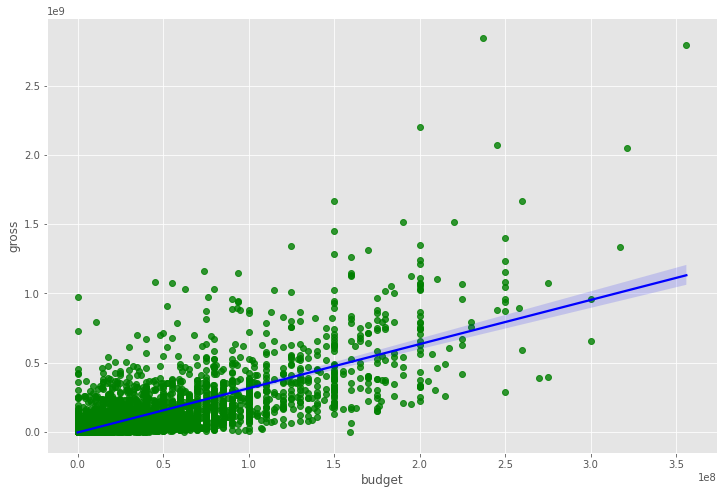

In [99]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"green"}, line_kws={"color":"blue"})

In [100]:
# To find out the correlation

df.corr()

,score,votes,budget,gross,runtime,release_year
score,1.000000,0.409221,0.055542,0.186314,0.399403,0.105938
votes,0.409221,1.000000,0.486860,0.632833,0.309174,0.218300
budget,0.055542,0.486860,1.000000,0.750141,0.269510,0.300066
gross,0.186314,0.632833,0.750141,1.000000,0.245235,0.255026
runtime,0.399403,0.309174,0.269510,0.245235,1.000000,0.120636
release_year,0.105938,0.218300,0.300066,0.255026,0.120636,1.000000


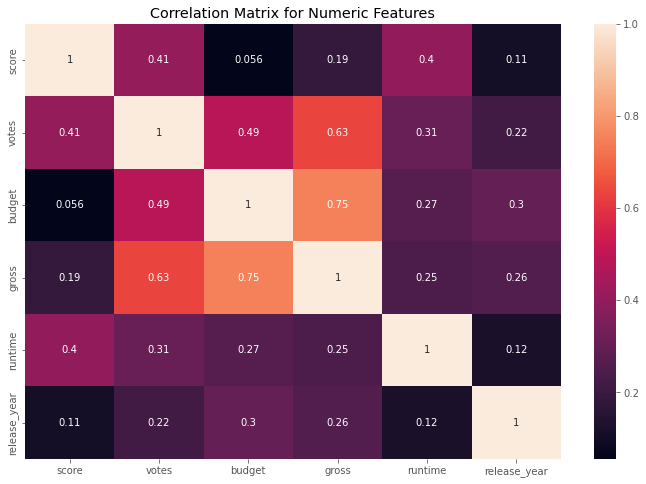

In [101]:
# create heap map

correlation_matrix = df.corr(method='pearson')
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [102]:
# Look at Company

df_numerized = df.copy()

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,6586,6,6,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146.0,1980-06-13,56,1980
1,5572,6,1,5.8,65000,2269,1632,327,55,4500000,58853106,731,104.0,1980-07-02,56,1980
2,5141,4,0,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124.0,1980-06-20,56,1980
3,286,4,4,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88.0,1980-07-02,56,1980
4,1027,6,4,7.3,108000,1054,521,410,55,6000000,39846344,1777,98.0,1980-07-25,56,1980


In [103]:
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States,1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States,1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States,1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States,1980


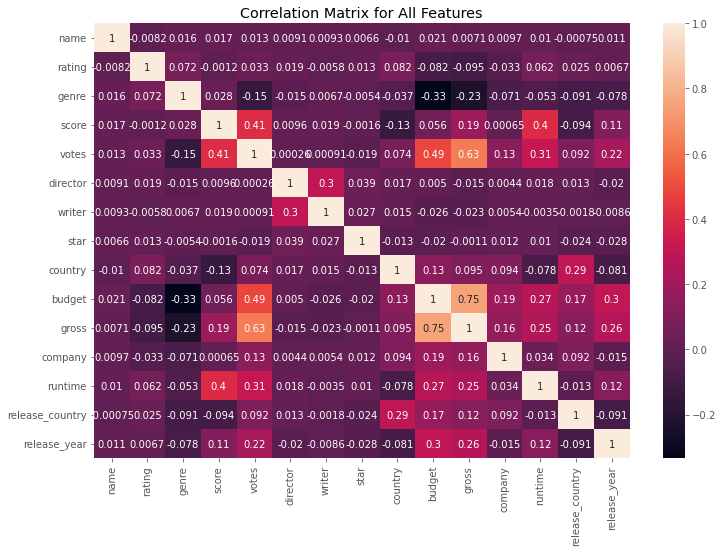

In [105]:
# create heap map for df_numeralized

correlation_matrix_numerized = df_numerized.corr(method='pearson')
plt.title("Correlation Matrix for All Features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
sns.heatmap(correlation_matrix_numerized, annot=True)
plt.show()

In [106]:
# To see correlation arranged in order

corr_pairs = correlation_matrix_numerized.unstack()
corr_pairs

name          name               1.000000
              rating            -0.008233
              genre              0.016173
              score              0.017259
              votes              0.013067
                                   ...   
release_year  gross              0.255026
              company           -0.015171
              runtime            0.120636
              release_country   -0.091295
              release_year       1.000000
Length: 225, dtype: float64

In [109]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget           genre             -0.333945
genre            budget            -0.333945
                 gross             -0.234237
gross            genre             -0.234237
votes            genre             -0.145299
                                      ...   
score            score              1.000000
genre            genre              1.000000
rating           rating             1.000000
release_country  release_country    1.000000
release_year     release_year       1.000000
Length: 225, dtype: float64

In [110]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes            gross              0.632833
gross            votes              0.632833
budget           gross              0.750141
gross            budget             0.750141
name             name               1.000000
star             star               1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
genre            genre              1.000000
rating           rating             1.000000
release_country  release_country    1.000000
release_year     release_year       1.000000
dtype: float64

### Votes and Budget have the highest correlation to Gross earnings
### Company has low correlation